In [10]:
import pandas as pd 
import matplotlib.pyplot as plt 

In [11]:
#read the CSV file into a dataframe
df= pd.read_csv('pG_savitski_no_remap_1000.csv')

#select columns that you want to keep 
columns_to_keep=['Protein IDs', 'Q-value', 'Score']
new_df= df[columns_to_keep]
print(new_df)

#print(new_df) 
new_df.to_csv('ProteinIDs_savitski_no_remap_1000_withScore.csv', index=False)

                        Protein IDs   Q-value     Score
0             sp|P09669|COX6C_HUMAN  0.000286  4.000000
1             sp|Q14204|DYHC1_HUMAN  0.000286  4.000000
2             sp|P51149|RAB7A_HUMAN  0.000286  4.000000
3              sp|P06396|GELS_HUMAN  0.000286  4.000000
4             sp|Q12768|WASC5_HUMAN  0.000286  4.000000
...                             ...       ...       ...
41711       sp|Q9BUR5-2|MIC26_HUMAN  0.666627  0.302434
41712        REV__sR|single_ribo101  0.666640  0.302245
41713       pI|c2riboseqorf50_HUMAN  0.666640  0.302060
41714  REV__sp|Q8N608-2|DPP10_HUMAN  0.666680  0.301799
41715    REV__sp|Q5JTD0|TJAP1_HUMAN  0.666720  0.301066

[41716 rows x 3 columns]


In [12]:
df = pd.read_csv('ProteinIDs_savitski_no_remap_1000_withScore.csv')

# Split the column by '|', but only keep the first two splits if there are more than 2
split_col = df['Protein IDs'].str.split('|', n=2, expand=True)

# Rename the new columns
split_col.columns = ['Protein Type', 'Protein Uniprot', 'Protein Label']

# Concatenate the original DataFrame and the new columns
new_df = pd.concat([df['Q-value'], split_col], axis=1)
print(new_df)
new_df.to_csv('SeparateProteinIDs_savitski_no_remap_1000_withScore.csv')

        Q-value Protein Type       Protein Uniprot Protein Label
0      0.000286           sp                P09669   COX6C_HUMAN
1      0.000286           sp                Q14204   DYHC1_HUMAN
2      0.000286           sp                P51149   RAB7A_HUMAN
3      0.000286           sp                P06396    GELS_HUMAN
4      0.000286           sp                Q12768   WASC5_HUMAN
...         ...          ...                   ...           ...
41711  0.666627           sp              Q9BUR5-2   MIC26_HUMAN
41712  0.666640      REV__sR        single_ribo101          None
41713  0.666640           pI  c2riboseqorf50_HUMAN          None
41714  0.666680      REV__sp              Q8N608-2   DPP10_HUMAN
41715  0.666720      REV__sp                Q5JTD0   TJAP1_HUMAN

[41716 rows x 4 columns]


sp         19555
REV__sp    11201
REV__sR     2876
sR          2813
REV__pI     2129
pI          2129
sU           350
REV__sU      310
nC           182
REV__nC      171
Name: Protein Type, dtype: int64


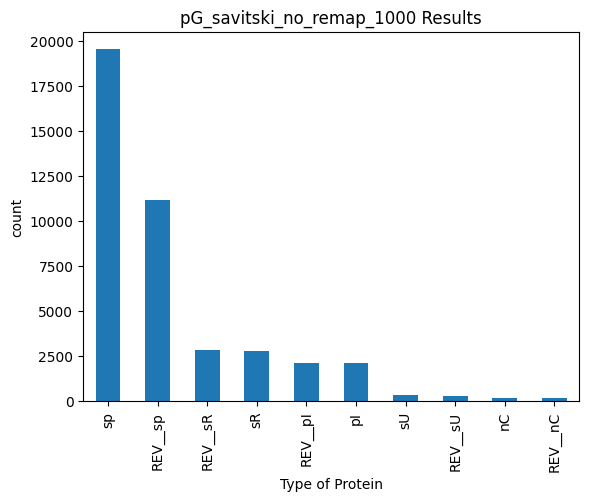

In [13]:
# Load the CSV file into a pandas DataFrame
df = pd.read_csv('SeparateProteinIDs_savitski_no_remap_1000_withScore.csv')

# Count the number of occurrences of each unique string in the 'Column 1' column
value_counts = df['Protein Type'].value_counts()

# Print the value counts
print(value_counts)

# Plot the value counts as a bar chart
value_counts.plot(kind='bar')
plt.title('pG_savitski_no_remap_1000 Results')
plt.xlabel('Type of Protein')
plt.ylabel('count')
plt.show()

Protein Type
REV__pI       1
REV__sR       3
REV__sp      72
nC            1
pI            1
sR            4
sp         7715
Name: Protein Type, dtype: int64


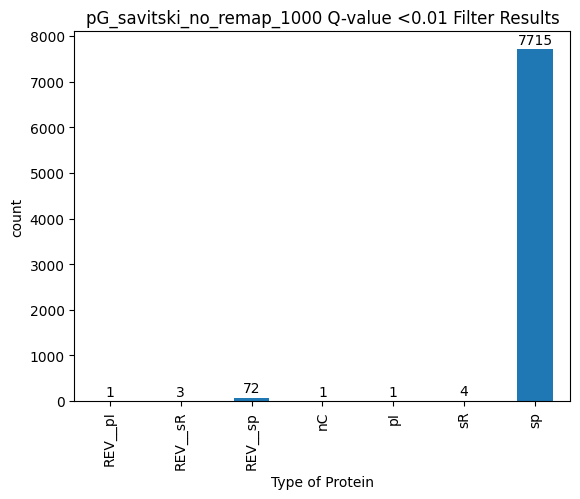

In [14]:
df = pd.read_csv('SeparateProteinIDs_savitski_no_remap_1000_withScore.csv')

# filter for Q-value < 0.01
df_filtered = df[df['Q-value'] < 0.01]

# group by protein type and count the number of each type
protein_count = df_filtered.groupby('Protein Type')['Protein Type'].count()

# print the protein count
print(protein_count)

# Plot the value counts as a bar chart
protein_count.plot(kind='bar')
plt.title('pG_savitski_no_remap_1000 Q-value <0.01 Filter Results')
plt.xlabel('Type of Protein')
plt.ylabel('count')
# add labels to the bars
for i, count in enumerate(protein_count):
    plt.text(i, count + 50, str(count), ha='center', va='bottom')

plt.show()
          

In [15]:
# filter for Q-value >= 0.01
df_above_cutoff = df[df['Q-value'] >= 0.01]

# group by protein type and count the number of each type above the Q-value cutoff
protein_count_above = df_above_cutoff.groupby('Protein Type')['Protein Type'].count()

# print the protein counts
print("Protein count below Q-value cutoff:")
print(protein_count)
print("\nProtein count above Q-value cutoff:")
print(protein_count_above)

Protein count below Q-value cutoff:
Protein Type
REV__pI       1
REV__sR       3
REV__sp      72
nC            1
pI            1
sR            4
sp         7715
Name: Protein Type, dtype: int64

Protein count above Q-value cutoff:
Protein Type
REV__nC      171
REV__pI     2128
REV__sR     2873
REV__sU      310
REV__sp    11129
nC           181
pI          2128
sR          2809
sU           350
sp         11840
Name: Protein Type, dtype: int64


# Q-value filter CUTOFF <0.01

/var/folders/bt/n98c3tq15s3d6866b0l_z_400000gn/T/ipykernel_60513/1948088013.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_below_cutoff['Protein Type'] = df_below_cutoff['Protein Type'].replace(['REV__pI', 'REV__sR','REV__nC', 'REV__sU', 'pI', 'sR', 'nC','sU'], 'Microprotein')
/var/folders/bt/n98c3tq15s3d6866b0l_z_400000gn/T/ipykernel_60513/1948088013.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_below_cutoff['Protein Type'] = df_below_cutoff['Protein Type'].replace(['sp', 'REV__sp'], 'sp')

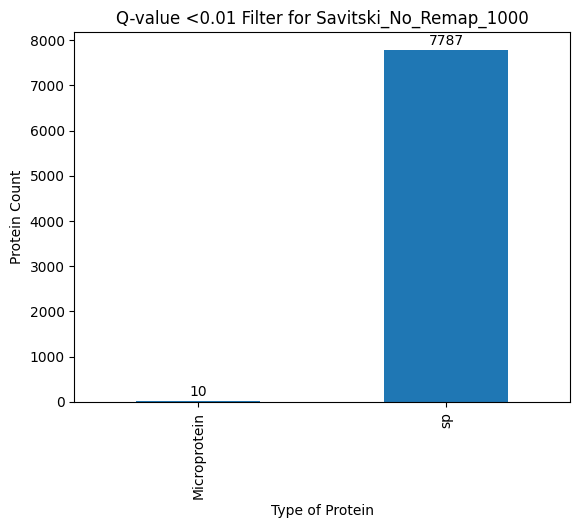

In [16]:

# filter for Q-value < 0.01
df_below_cutoff = df[df['Q-value'] < 0.01]

# combine counts for REV__pI, REV__sR, REV__nC, REV__sU, pI, sR, nC, sU as 'microproteins'
df_below_cutoff['Protein Type'] = df_below_cutoff['Protein Type'].replace(['REV__pI', 'REV__sR','REV__nC', 'REV__sU', 'pI', 'sR', 'nC','sU'], 'Microprotein')

# combine counts for sp and REV__sp as 'sp'
df_below_cutoff['Protein Type'] = df_below_cutoff['Protein Type'].replace(['sp', 'REV__sp'], 'sp')

# group by protein type and count the number of each type below the Q-value cutoff
protein_count_below = df_below_cutoff.groupby('Protein Type')['Protein Type'].count()

# plot the histogram
protein_count_below.plot(kind='bar')
plt.title('Q-value <0.01 Filter for Savitski_No_Remap_1000')
plt.xlabel('Type of Protein')
plt.ylabel('Protein Count')
# add labels to the bars
for i, count in enumerate(protein_count_below):
    plt.text(i, count + 50, str(count), ha='center', va='bottom')

plt.show()

# No Q-value filter

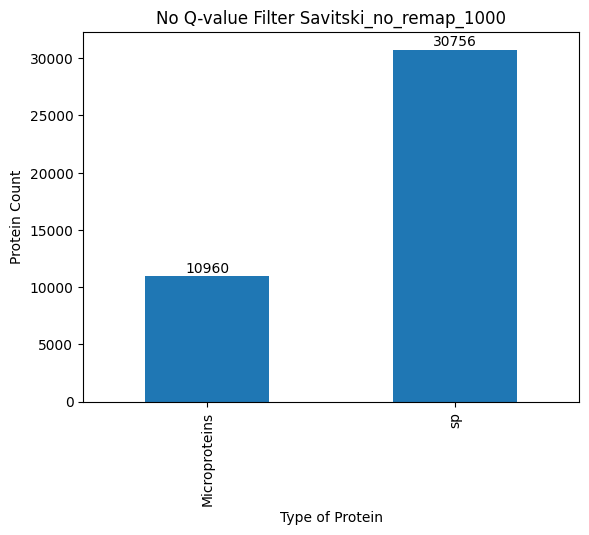

In [17]:
# combine counts for REV__pI, REV__sR, REV__nC, REV__sU, pI, sR, nC, sU as 'microproteins'
df['Protein Type'] = df['Protein Type'].replace(['REV__pI', 'REV__sR', 'REV__nC', 'REV__sU', 'pI', 'sR', 'nC', 'sU'], 'Microproteins')

# combine counts for sp and REV__sp as 'sp'
df['Protein Type'] = df['Protein Type'].replace(['sp', 'REV__sp'], 'sp')

# group by protein type and count the number of each type
protein_count = df.groupby('Protein Type')['Protein Type'].count()

# plot the histogram
protein_count.plot(kind='bar')
plt.title('No Q-value Filter Savitski_no_remap_1000')
plt.xlabel('Type of Protein')
plt.ylabel('Protein Count')

# add labels to the bars
for i, count in enumerate(protein_count):
    plt.text(i, count + 50, str(count), ha='center', va='bottom')

plt.show()